In [1]:
import numpy as np
import math
import sys
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import itertools

In [2]:
#Optimisation Variables
# Number of cycles
num_cycles = 150
# Number of trials per cycle
num_trials = 75
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001
#number of repetitions per policy
num_rep=50


In [3]:
#Simulation Variables
officer_max_rec=20
officer_min_rec=0
sailor_max_rec=25
sailor_min_rec=0

#Promotion
SailorRank1Reset2NSGL_min=0
SailorRank1Reset2NSGL_max=2
SailorRank1NSGL2Avb_min=0
SailorRank1NSGL2Avb_max=1
SailorRank1Reset2Readying_min=6
SailorRank1Reset2Readying_max=8
SailorRank1Readying2Avb_min=6
SailorRank1Readying2Avb_max=8

OfficerRank1Reset2NSGL_min=0
OfficerRank1Reset2NSGL_max=2
OfficerRank1NSGL2Avb_min=0
OfficerRank1NSGL2Avb_max=2
OfficerRank1Reset2Readying_min=9
OfficerRank1Reset2Readying_max=11
OfficerRank1Readying2Avb_min=9
OfficerRank1Readying2Avb_max=11

SailorRank2Reset2NSGL_min=0
SailorRank2Reset2NSGL_max=2
SailorRank2NSGL2Avb_min=0
SailorRank2NSGL2Avb_max=2
SailorRank2Reset2Readying_min=3
SailorRank2Reset2Readying_max=5
SailorRank2Readying2Avb_min=3
SailorRank2Readying2Avb_max=5

OfficerRank2Reset2NSGL_min=12
OfficerRank2Reset2NSGL_max=18
OfficerRank2NSGL2Avb_min=12
OfficerRank2NSGL2Avb_max=18
OfficerRank2Reset2Readying_min=3
OfficerRank2Reset2Readying_max=5
OfficerRank2Readying2Avb_min=3
OfficerRank2Readying2Avb_max=5

SailorRank3Reset2NSGL_min=2
SailorRank3Reset2NSGL_max=4
SailorRank3NSGL2Avb_min=2
SailorRank3NSGL2Avb_max=4
SailorRank3Reset2Readying_min=4
SailorRank3Reset2Readying_max=6
SailorRank3Readying2Avb_min=4
SailorRank3Readying2Avb_max=6

OfficerRank3Reset2NSGL_min=3
OfficerRank3Reset2NSGL_max=5
OfficerRank3NSGL2Avb_min=3
OfficerRank3NSGL2Avb_max=5
OfficerRank3Reset2Readying_min=4
OfficerRank3Reset2Readying_max=6
OfficerRank3Readying2Avb_min=4
OfficerRank3Readying2Avb_max=6

SailorRank4Reset2NSGL_min=3
SailorRank4Reset2NSGL_max=6
SailorRank4NSGL2Avb_min=0
SailorRank4NSGL2Avb_max=0
SailorRank4Reset2Readying_min=0
SailorRank4Reset2Readying_max=0
SailorRank4Readying2Avb_min=0
SailorRank4Readying2Avb_max=0

OfficerRank4Reset2NSGL_min=3
OfficerRank4Reset2NSGL_max=5
OfficerRank4NSGL2Avb_min=0
OfficerRank4NSGL2Avb_max=0
OfficerRank4Reset2Readying_min=0
OfficerRank4Reset2Readying_max=0
OfficerRank4Readying2Avb_min=0
OfficerRank4Readying2Avb_max=0

### Time
SailorTimeRank1Reset2NSGL_min=1
SailorTimeRank1Reset2NSGL_max=3
SailorTimeRank1NSGL2Avb_min=1
SailorTimeRank1NSGL2Avb_max=3
SailorTimeRank1Reset2Readying_min=3
SailorTimeRank1Reset2Readying_max=5
SailorTimeRank1Readying2Avb_min=3
SailorTimeRank1Readying2Avb_max=5

OfficerTimeRank1Reset2NSGL_min=1
OfficerTimeRank1Reset2NSGL_max=3
OfficerTimeRank1NSGL2Avb_min=1
OfficerTimeRank1NSGL2Avb_max=3
OfficerTimeRank1Reset2Readying_min=3
OfficerTimeRank1Reset2Readying_max=5
OfficerTimeRank1Readying2Avb_min=3
OfficerTimeRank1Readying2Avb_max=5


SailorTimeRank2Reset2NSGL_min=1
SailorTimeRank2Reset2NSGL_max=3
SailorTimeRank2NSGL2Avb_min=1
SailorTimeRank2NSGL2Avb_max=3
SailorTimeRank2Reset2Readying_min=3
SailorTimeRank2Reset2Readying_max=5
SailorTimeRank2Readying2Avb_min=3
SailorTimeRank2Readying2Avb_max=5

OfficerTimeRank2Reset2NSGL_min=1
OfficerTimeRank2Reset2NSGL_max=3
OfficerTimeRank2NSGL2Avb_min=1
OfficerTimeRank2NSGL2Avb_max=3
OfficerTimeRank2Reset2Readying_min=3
OfficerTimeRank2Reset2Readying_max=5
OfficerTimeRank2Readying2Avb_min=3
OfficerTimeRank2Readying2Avb_max=5

SailorTimeRank3Reset2NSGL_min=2
SailorTimeRank3Reset2NSGL_max=4
SailorTimeRank3NSGL2Avb_min=2
SailorTimeRank3NSGL2Avb_max=4
SailorTimeRank3Reset2Readying_min=3
SailorTimeRank3Reset2Readying_max=5
SailorTimeRank3Readying2Avb_min=3
SailorTimeRank3Readying2Avb_max=5

OfficerTimeRank3Reset2NSGL_min=1
OfficerTimeRank3Reset2NSGL_max=3
OfficerTimeRank3NSGL2Avb_min=1
OfficerTimeRank3NSGL2Avb_max=3
OfficerTimeRank3Reset2Readying_min=3
OfficerTimeRank3Reset2Readying_max=5
OfficerTimeRank3Readying2Avb_min=3
OfficerTimeRank3Readying2Avb_max=5

SailorTimeRank4Reset2NSGL_min=3
SailorTimeRank4Reset2NSGL_max=5
SailorTimeRank4NSGL2Avb_min=0
SailorTimeRank4NSGL2Avb_max=0
SailorTimeRank4Reset2Readying_min=0
SailorTimeRank4Reset2Readying_max=0
SailorTimeRank4Readying2Avb_min=0
SailorTimeRank4Readying2Avb_max=0

OfficerTimeRank4Reset2NSGL_min=3
OfficerTimeRank4Reset2NSGL_max=5
OfficerTimeRank4NSGL2Avb_min=0
OfficerTimeRank4NSGL2Avb_max=0
OfficerTimeRank4Reset2Readying_min=0
OfficerTimeRank4Reset2Readying_max=0
OfficerTimeRank4Readying2Avb_min=0
OfficerTimeRank4Readying2Avb_max=0


In [4]:
from javaconnector import KronosModelConnector

kronos = KronosModelConnector()

In [5]:
def dataset2list(dataSet):
    List=[]
    for idx in range(0, dataSet.size()):
        List.append(dataSet.getY(idx))
    return List

In [6]:
#Generate Recruitment Policy
def generateRec(kronos,officer_min_rec,officer_max_rec,sailor_min_rec,sailor_max_rec):
    dirFile= "conf/Model-Config_ZA_TP3.xlsx"
    kronos.load_config(dirFile)
    num_quarters= kronos.conf.sim_length_months/3
    a=np.random.randint(officer_min_rec,officer_max_rec+1,int(num_quarters))
    b=np.random.randint(sailor_min_rec,sailor_max_rec+1,int(num_quarters))
    rec_policy=[a,b]
    return rec_policy

In [7]:
#Generate time in rank policy
def generatePromoteTime(kronos,SailorTimeRank1Reset2NSGL_max, SailorTimeRank1NSGL2Avb_min, SailorTimeRank1NSGL2Avb_max, SailorTimeRank1Reset2Readying_min, SailorTimeRank1Reset2Readying_max, SailorTimeRank1Readying2Avb_min, SailorTimeRank1Readying2Avb_max, OfficerTimeRank1Reset2NSGL_min, OfficerTimeRank1Reset2NSGL_max, OfficerTimeRank1NSGL2Avb_min, OfficerTimeRank1NSGL2Avb_max, OfficerTimeRank1Reset2Readying_min, OfficerTimeRank1Reset2Readying_max, OfficerTimeRank1Readying2Avb_min, OfficerTimeRank1Readying2Avb_max, SailorTimeRank2Reset2NSGL_min, SailorTimeRank2Reset2NSGL_max, SailorTimeRank2NSGL2Avb_min, SailorTimeRank2NSGL2Avb_max, SailorTimeRank2Reset2Readying_min, SailorTimeRank2Reset2Readying_max, SailorTimeRank2Readying2Avb_min, SailorTimeRank2Readying2Avb_max, OfficerTimeRank2Reset2NSGL_min, OfficerTimeRank2Reset2NSGL_max, OfficerTimeRank2NSGL2Avb_min, OfficerTimeRank2NSGL2Avb_max, OfficerTimeRank2Reset2Readying_min, OfficerTimeRank2Reset2Readying_max, OfficerTimeRank2Readying2Avb_min, OfficerTimeRank2Readying2Avb_max, SailorTimeRank3Reset2NSGL_min, SailorTimeRank3Reset2NSGL_max, SailorTimeRank3NSGL2Avb_min, SailorTimeRank3NSGL2Avb_max, SailorTimeRank3Reset2Readying_min, SailorTimeRank3Reset2Readying_max, SailorTimeRank3Readying2Avb_min, SailorTimeRank3Readying2Avb_max, OfficerTimeRank3Reset2NSGL_min, OfficerTimeRank3Reset2NSGL_max, OfficerTimeRank3NSGL2Avb_min, OfficerTimeRank3NSGL2Avb_max, OfficerTimeRank3Reset2Readying_min, OfficerTimeRank3Reset2Readying_max, OfficerTimeRank3Readying2Avb_min, OfficerTimeRank3Readying2Avb_max, SailorTimeRank4Reset2NSGL_min, SailorTimeRank4Reset2NSGL_max, SailorTimeRank4NSGL2Avb_min, SailorTimeRank4NSGL2Avb_max, SailorTimeRank4Reset2Readying_min, SailorTimeRank4Reset2Readying_max, SailorTimeRank4Readying2Avb_min, SailorTimeRank4Readying2Avb_max, OfficerTimeRank4Reset2NSGL_min, OfficerTimeRank4Reset2NSGL_max, OfficerTimeRank4NSGL2Avb_min, OfficerTimeRank4NSGL2Avb_max, OfficerTimeRank4Reset2Readying_min, OfficerTimeRank4Reset2Readying_max, OfficerTimeRank4Readying2Avb_min,OfficerTimeRank4Readying2Avb_max):
    dirFile= "conf/Model-Config_ZA_TP3.xlsx"
    kronos.load_config(dirFile)
    S_Rank1TimeRes2N=np.random.randint(SailorTimeRank1Reset2NSGL_min, SailorTimeRank1Reset2NSGL_max+1,1)
    S_Rank1TimeN2Av=np.random.randint(SailorTimeRank1NSGL2Avb_min, SailorTimeRank1NSGL2Avb_max+1,1)
    S_Rank1TimeRes2Read=np.random.randint(SailorTimeRank1Reset2Readying_min, SailorTimeRank1Reset2Readying_max+1,1)
    S_Rank1TimeRead2Av=np.random.randint(SailorTimeRank1Readying2Avb_min,SailorTimeRank1Readying2Avb_max+1,1)
    O_Rank1TimeRes2N=np.random.randint(OfficerTimeRank1Reset2NSGL_min, OfficerTimeRank1Reset2NSGL_max+1,1)
    O_Rank1TimeN2Av=np.random.randint(OfficerTimeRank1NSGL2Avb_min, OfficerTimeRank1NSGL2Avb_max+1,1)
    O_Rank1TimeRes2Read=np.random.randint(OfficerTimeRank1Reset2Readying_min, OfficerTimeRank1Reset2Readying_max+1,1)
    O_Rank1TimeRead2Av=np.random.randint(OfficerTimeRank1Readying2Avb_min,OfficerTimeRank1Readying2Avb_max+1,1)
    
    S_Rank2TimeRes2N=np.random.randint(SailorTimeRank2Reset2NSGL_min, SailorTimeRank2Reset2NSGL_max+1,1)
    S_Rank2TimeN2Av=np.random.randint(SailorTimeRank2NSGL2Avb_min, SailorTimeRank2NSGL2Avb_max+1,1)
    S_Rank2TimeRes2Read=np.random.randint(SailorTimeRank2Reset2Readying_min, SailorTimeRank2Reset2Readying_max+1,1)
    S_Rank2TimeRead2Av=np.random.randint(SailorTimeRank2Readying2Avb_min,SailorTimeRank2Readying2Avb_max+1,1)
    O_Rank2TimeRes2N=np.random.randint(OfficerTimeRank2Reset2NSGL_min, OfficerTimeRank2Reset2NSGL_max+1,1)
    O_Rank2TimeN2Av=np.random.randint(OfficerTimeRank2NSGL2Avb_min, OfficerTimeRank2NSGL2Avb_max+1,1)
    O_Rank2TimeRes2Read=np.random.randint(OfficerTimeRank2Reset2Readying_min, OfficerTimeRank2Reset2Readying_max+1,1)
    O_Rank2TimeRead2Av=np.random.randint(OfficerTimeRank2Readying2Avb_min,OfficerTimeRank2Readying2Avb_max+1,1)
    
    S_Rank3TimeRes2N=np.random.randint(SailorTimeRank3Reset2NSGL_min, SailorTimeRank3Reset2NSGL_max+1,1)
    S_Rank3TimeN2Av=np.random.randint(SailorTimeRank3NSGL2Avb_min, SailorTimeRank3NSGL2Avb_max+1,1)
    S_Rank3TimeRes2Read=np.random.randint(SailorTimeRank3Reset2Readying_min, SailorTimeRank3Reset2Readying_max+1,1)
    S_Rank3TimeRead2Av=np.random.randint(SailorTimeRank3Readying2Avb_min,SailorTimeRank3Readying2Avb_max+1,1)
    O_Rank3TimeRes2N=np.random.randint(OfficerTimeRank3Reset2NSGL_min, OfficerTimeRank3Reset2NSGL_max+1,1)
    O_Rank3TimeN2Av=np.random.randint(OfficerTimeRank3NSGL2Avb_min, OfficerTimeRank3NSGL2Avb_max+1,1)
    O_Rank3TimeRes2Read=np.random.randint(OfficerTimeRank3Reset2Readying_min, OfficerTimeRank3Reset2Readying_max+1,1)
    O_Rank3TimeRead2Av=np.random.randint(OfficerTimeRank3Readying2Avb_min,OfficerTimeRank3Readying2Avb_max+1,1)
    
    S_Rank4TimeRes2N=np.random.randint(SailorTimeRank4Reset2NSGL_min, SailorTimeRank4Reset2NSGL_max+1,1)
    
    O_Rank4TimeRes2N=np.random.randint(OfficerTimeRank4Reset2NSGL_min, OfficerTimeRank4Reset2NSGL_max+1,1)
    
    
    promTime_policy=[S_Rank1TimeRes2N,S_Rank1TimeN2Av,S_Rank1TimeRes2Read,S_Rank1TimeRead2Av,O_Rank1TimeRes2N,O_Rank1TimeN2Av,O_Rank1TimeRes2Read,O_Rank1TimeRead2Av,S_Rank2TimeRes2N,S_Rank2TimeN2Av,S_Rank2TimeRes2Read,S_Rank2TimeRead2Av,O_Rank2TimeRes2N,O_Rank2TimeN2Av,O_Rank2TimeRes2Read,O_Rank2TimeRead2Av,S_Rank3TimeRes2N,S_Rank3TimeN2Av,S_Rank3TimeRes2Read,S_Rank3TimeRead2Av,O_Rank3TimeRes2N,O_Rank3TimeN2Av,O_Rank3TimeRes2Read,O_Rank3TimeRead2Av,S_Rank4TimeRes2N,O_Rank4TimeRes2N]
    return promTime_policy

In [8]:
#Generate number of members promoted policy
def generatePromoteNum(kronos,SailorRank1Reset2NSGL_min, SailorRank1Reset2NSGL_max, SailorRank1NSGL2Avb_min, SailorRank1NSGL2Avb_max, SailorRank1Reset2Readying_min, SailorRank1Reset2Readying_max, SailorRank1Readying2Avb_min, SailorRank1Readying2Avb_max, OfficerRank1Reset2NSGL_min, OfficerRank1Reset2NSGL_max, OfficerRank1NSGL2Avb_min, OfficerRank1NSGL2Avb_max, OfficerRank1Reset2Readying_min, OfficerRank1Reset2Readying_max, OfficerRank1Readying2Avb_min, OfficerRank1Readying2Avb_max, SailorRank2Reset2NSGL_min, SailorRank2Reset2NSGL_max, SailorRank2NSGL2Avb_min, SailorRank2NSGL2Avb_max, SailorRank2Reset2Readying_min, SailorRank2Reset2Readying_max, SailorRank2Readying2Avb_min, SailorRank2Readying2Avb_max, OfficerRank2Reset2NSGL_min, OfficerRank2Reset2NSGL_max, OfficerRank2NSGL2Avb_min, OfficerRank2NSGL2Avb_max, OfficerRank2Reset2Readying_min, OfficerRank2Reset2Readying_max, OfficerRank2Readying2Avb_min, OfficerRank2Readying2Avb_max, SailorRank3Reset2NSGL_min, SailorRank3Reset2NSGL_max, SailorRank3NSGL2Avb_min, SailorRank3NSGL2Avb_max, SailorRank3Reset2Readying_min, SailorRank3Reset2Readying_max, SailorRank3Readying2Avb_min, SailorRank3Readying2Avb_max, OfficerRank3Reset2NSGL_min, OfficerRank3Reset2NSGL_max, OfficerRank3NSGL2Avb_min, OfficerRank3NSGL2Avb_max, OfficerRank3Reset2Readying_min, OfficerRank3Reset2Readying_max, OfficerRank3Readying2Avb_min, OfficerRank3Readying2Avb_max, SailorRank4Reset2NSGL_min, SailorRank4Reset2NSGL_max, SailorRank4NSGL2Avb_min, SailorRank4NSGL2Avb_max, SailorRank4Reset2Readying_min, SailorRank4Reset2Readying_max, SailorRank4Readying2Avb_min, SailorRank4Readying2Avb_max, OfficerRank4Reset2NSGL_min, OfficerRank4Reset2NSGL_max, OfficerRank4NSGL2Avb_min, OfficerRank4NSGL2Avb_max, OfficerRank4Reset2Readying_min, OfficerRank4Reset2Readying_max, OfficerRank4Readying2Avb_min, OfficerRank4Readying2Avb_max):
    dirFile= "conf/Model-Config_ZA_TP3.xlsx"
    kronos.load_config(dirFile)
    
    S_Rank1Res2N=np.random.randint(SailorRank1Reset2NSGL_min, SailorRank1Reset2NSGL_max+1,1)
    S_Rank1N2Av=np.random.randint(SailorRank1NSGL2Avb_min, SailorRank1NSGL2Avb_max+1,1)
    S_Rank1Res2Read=np.random.randint(SailorRank1Reset2Readying_min, SailorRank1Reset2Readying_max+1,1)
    S_Rank1Read2Av=np.random.randint(SailorRank1Readying2Avb_min,SailorRank1Readying2Avb_max+1,1)
    O_Rank1Res2N=np.random.randint(OfficerRank1Reset2NSGL_min, OfficerRank1Reset2NSGL_max+1,1)
    O_Rank1N2Av=np.random.randint(OfficerRank1NSGL2Avb_min, OfficerRank1NSGL2Avb_max+1,1)
    O_Rank1Res2Read=np.random.randint(OfficerRank1Reset2Readying_min, OfficerRank1Reset2Readying_max+1,1)
    O_Rank1Read2Av=np.random.randint(OfficerRank1Readying2Avb_min,OfficerRank1Readying2Avb_max+1,1)
    
    
    S_Rank2Res2N=np.random.randint(SailorRank2Reset2NSGL_min, SailorRank2Reset2NSGL_max+1,1)
    S_Rank2N2Av=np.random.randint(SailorRank2NSGL2Avb_min, SailorRank2NSGL2Avb_max+1,1)
    S_Rank2Res2Read=np.random.randint(SailorRank2Reset2Readying_min, SailorRank2Reset2Readying_max+1,1)
    S_Rank2Read2Av=np.random.randint(SailorRank2Readying2Avb_min,SailorRank2Readying2Avb_max+1,1)
    O_Rank2Res2N=np.random.randint(OfficerRank2Reset2NSGL_min, OfficerRank2Reset2NSGL_max+1,1)
    O_Rank2N2Av=np.random.randint(OfficerRank2NSGL2Avb_min, OfficerRank2NSGL2Avb_max+1,1)
    O_Rank2Res2Read=np.random.randint(OfficerRank2Reset2Readying_min, OfficerRank2Reset2Readying_max+1,1)
    O_Rank2Read2Av=np.random.randint(OfficerRank2Readying2Avb_min,OfficerRank2Readying2Avb_max+1,1)
    
    
    S_Rank3Res2N=np.random.randint(SailorRank3Reset2NSGL_min, SailorRank3Reset2NSGL_max+1,1)
    S_Rank3N2Av=np.random.randint(SailorRank3NSGL2Avb_min, SailorRank3NSGL2Avb_max+1,1)
    S_Rank3Res2Read=np.random.randint(SailorRank3Reset2Readying_min, SailorRank3Reset2Readying_max+1,1)
    S_Rank3Read2Av=np.random.randint(SailorRank3Readying2Avb_min,SailorRank3Readying2Avb_max+1,1)
    O_Rank3Res2N=np.random.randint(OfficerRank3Reset2NSGL_min, OfficerRank3Reset2NSGL_max+1,1)
    O_Rank3N2Av=np.random.randint(OfficerRank3NSGL2Avb_min, OfficerRank3NSGL2Avb_max+1,1)
    O_Rank3Res2Read=np.random.randint(OfficerRank3Reset2Readying_min, OfficerRank3Reset2Readying_max+1,1)
    O_Rank3Read2Av=np.random.randint(OfficerRank3Readying2Avb_min,OfficerRank3Readying2Avb_max+1,1)
    
    
    S_Rank4Res2N=np.random.randint(SailorRank4Reset2NSGL_min, SailorRank4Reset2NSGL_max+1,1)
    O_Rank4Res2N=np.random.randint(OfficerRank4Reset2NSGL_min, OfficerRank4Reset2NSGL_max+1,1)

    
    prom_policy=[S_Rank1Res2N,S_Rank1N2Av,S_Rank1Res2Read,S_Rank1Read2Av,O_Rank1Res2N,O_Rank1N2Av,O_Rank1Res2Read,O_Rank1Read2Av,S_Rank2Res2N,S_Rank2N2Av,S_Rank2Res2Read,S_Rank2Read2Av,O_Rank2Res2N,O_Rank2N2Av,O_Rank2Res2Read,O_Rank2Read2Av,S_Rank3Res2N,S_Rank3N2Av,S_Rank3Res2Read,S_Rank3Read2Av,O_Rank3Res2N,O_Rank3N2Av,O_Rank3Res2Read,O_Rank3Read2Av,S_Rank4Res2N,O_Rank4Res2N]
    return prom_policy

In [9]:
#Input all variables into workforce model and output results
def policyOut(kronos,rec_policy,loss_numS, loss_numO,promTime_policy,prom_policy):
    dirFile= "conf/Model-Config_ZA_TP3.xlsx"
    kronos.load_config(dirFile)
    num_quarters= kronos.conf.sim_length_months/3
    
    kronos.conf.set_average_time( "Sailor", "Reset to NSGL", "Rank 1", promTime_policy[0]  )
    kronos.conf.set_average_time( "Sailor", "NSGL to Available", "Rank 1", promTime_policy[1] )
    kronos.conf.set_average_time( "Sailor", "Reset to Readying", "Rank 1", promTime_policy[2] )
    kronos.conf.set_average_time( "Sailor", "Readying to Available", "Rank 1", promTime_policy[3] )
    kronos.conf.set_average_time( "Officer", "Reset to NSGL", "Rank 1", promTime_policy[4] )
    kronos.conf.set_average_time( "Officer", "NSGL to Available", "Rank 1", promTime_policy[5])
    kronos.conf.set_average_time( "Officer", "Reset to Readying", "Rank 1", promTime_policy[6] )
    kronos.conf.set_average_time( "Officer", "Readying to Available", "Rank 1", promTime_policy[7] )

    kronos.conf.set_average_time( "Sailor", "Reset to NSGL", "Rank 2", promTime_policy[8] )
    kronos.conf.set_average_time( "Sailor", "NSGL to Available", "Rank 2", promTime_policy[9] )
    kronos.conf.set_average_time( "Sailor", "Reset to Readying", "Rank 2", promTime_policy[10] )
    kronos.conf.set_average_time( "Sailor", "Readying to Available", "Rank 2", promTime_policy[11] )
    kronos.conf.set_average_time( "Officer", "Reset to NSGL", "Rank 2", promTime_policy[12] )
    kronos.conf.set_average_time( "Officer", "NSGL to Available", "Rank 2", promTime_policy[13] )
    kronos.conf.set_average_time( "Officer", "Reset to Readying", "Rank 2", promTime_policy[14] )
    kronos.conf.set_average_time( "Officer", "Readying to Available", "Rank 2", promTime_policy[15] )
    
    kronos.conf.set_average_time( "Sailor", "Reset to NSGL", "Rank 3", promTime_policy[16] )
    kronos.conf.set_average_time( "Sailor", "NSGL to Available", "Rank 3", promTime_policy[17] )
    kronos.conf.set_average_time( "Sailor", "Reset to Readying", "Rank 3", promTime_policy[18] )
    kronos.conf.set_average_time( "Sailor", "Readying to Available", "Rank 3", promTime_policy[19] )
    kronos.conf.set_average_time( "Officer", "Reset to NSGL", "Rank 3", promTime_policy[20] )
    kronos.conf.set_average_time( "Officer", "NSGL to Available", "Rank 3", promTime_policy[21] )
    kronos.conf.set_average_time( "Officer", "Reset to Readying", "Rank 3", promTime_policy[22] )
    kronos.conf.set_average_time( "Officer", "Readying to Available", "Rank 3", promTime_policy[23] )
    
    kronos.conf.set_average_time( "Sailor", "Reset to NSGL", "Rank 4", promTime_policy[24] )
    kronos.conf.set_average_time( "Sailor", "NSGL to Available", "Rank 4", 0 )
    kronos.conf.set_average_time( "Sailor", "Reset to Readying", "Rank 4", 0 )
    kronos.conf.set_average_time( "Sailor", "Readying to Available", "Rank 4", 0 )
    kronos.conf.set_average_time( "Officer", "Reset to NSGL", "Rank 4", promTime_policy[25] )
    kronos.conf.set_average_time( "Officer", "NSGL to Available", "Rank 4", 0 )
    kronos.conf.set_average_time( "Officer", "Reset to Readying", "Rank 4", 0 )
    kronos.conf.set_average_time( "Officer", "Readying to Available", "Rank 4", 0 )
    
    kronos.conf.set_max_transfer( "Sailor", "Reset to NSGL", "Rank 1", prom_policy[0]  )
    kronos.conf.set_max_transfer( "Sailor", "NSGL to Available", "Rank 1", prom_policy[1] )
    kronos.conf.set_max_transfer( "Sailor", "Reset to Readying", "Rank 1", prom_policy[2] )
    kronos.conf.set_max_transfer( "Sailor", "Readying to Available", "Rank 1", prom_policy[3] )
    kronos.conf.set_max_transfer( "Officer", "Reset to NSGL", "Rank 1", prom_policy[4] )
    kronos.conf.set_max_transfer( "Officer", "NSGL to Available", "Rank 1", prom_policy[5])
    kronos.conf.set_max_transfer( "Officer", "Reset to Readying", "Rank 1", prom_policy[6] )
    kronos.conf.set_max_transfer( "Officer", "Readying to Available", "Rank 1", prom_policy[7] )

    kronos.conf.set_max_transfer( "Sailor", "Reset to NSGL", "Rank 2", prom_policy[8] )
    kronos.conf.set_max_transfer( "Sailor", "NSGL to Available", "Rank 2", prom_policy[9] )
    kronos.conf.set_max_transfer( "Sailor", "Reset to Readying", "Rank 2", prom_policy[10] )
    kronos.conf.set_max_transfer( "Sailor", "Readying to Available", "Rank 2", prom_policy[11] )
    kronos.conf.set_max_transfer( "Officer", "Reset to NSGL", "Rank 2", prom_policy[12] )
    kronos.conf.set_max_transfer( "Officer", "NSGL to Available", "Rank 2", prom_policy[13] )
    kronos.conf.set_max_transfer( "Officer", "Reset to Readying", "Rank 2", prom_policy[14] )
    kronos.conf.set_max_transfer( "Officer", "Readying to Available", "Rank 2", prom_policy[15] )
    
    kronos.conf.set_max_transfer( "Sailor", "Reset to NSGL", "Rank 3", prom_policy[16] )
    kronos.conf.set_max_transfer( "Sailor", "NSGL to Available", "Rank 3", prom_policy[17] )
    kronos.conf.set_max_transfer( "Sailor", "Reset to Readying", "Rank 3", prom_policy[18] )
    kronos.conf.set_max_transfer( "Sailor", "Readying to Available", "Rank 3", prom_policy[19] )
    kronos.conf.set_max_transfer( "Officer", "Reset to NSGL", "Rank 3", prom_policy[20] )
    kronos.conf.set_max_transfer( "Officer", "NSGL to Available", "Rank 3", prom_policy[21] )
    kronos.conf.set_max_transfer( "Officer", "Reset to Readying", "Rank 3", prom_policy[22] )
    kronos.conf.set_max_transfer( "Officer", "Readying to Available", "Rank 3", prom_policy[23] )
    
    kronos.conf.set_max_transfer( "Sailor", "Reset to NSGL", "Rank 4", prom_policy[24] )
    kronos.conf.set_max_transfer( "Sailor", "NSGL to Available", "Rank 4", 0 )
    kronos.conf.set_max_transfer( "Sailor", "Reset to Readying", "Rank 4", 0 )
    kronos.conf.set_max_transfer( "Sailor", "Readying to Available", "Rank 4", 0 )
    kronos.conf.set_max_transfer( "Officer", "Reset to NSGL", "Rank 4", prom_policy[25] )
    kronos.conf.set_max_transfer( "Officer", "NSGL to Available", "Rank 4", 0 )
    kronos.conf.set_max_transfer( "Officer", "Reset to Readying", "Rank 4", 0 )
    kronos.conf.set_max_transfer( "Officer", "Readying to Available", "Rank 4", 0 )
    
    kronos.conf.clear_input_rate_schedules()
    
    uncert(kronos,loss_numS,loss_numO)


    for i in range(0, int(num_quarters)):
        kronos.conf.add_input_rate_schedule(i, "Sailor", rec_policy[1][i] )
        kronos.conf.add_input_rate_schedule(i, "Officer",rec_policy[0][i] )
    
    kronos.init_model()
    kronos.conf.set_slot_mode("ZERO_AVAILABLILTY")
 
    kronos.main.write_output = False;

    kronos.run_model()
    
    sailors = kronos.main.get_workforce( "Sailor" )
    officers = kronos.main.get_workforce( "Officer" )
    
    return  dataset2list(kronos.main.crewable_platformsDS), dataset2list(kronos.main.deployed_platformsDS) , dataset2list(kronos.main.docked_platformsDS) , dataset2list(sailors.rank_1_gapDS), dataset2list(sailors.rank_2_gapDS), dataset2list(sailors.rank_3_gapDS), dataset2list(sailors.rank_4_gapDS),dataset2list(officers.rank_1_gapDS), dataset2list(officers.rank_2_gapDS), dataset2list(officers.rank_3_gapDS), dataset2list(officers.rank_4_gapDS)

In [10]:
#Objective Function 
def fx(x3,y3,z3):
    rec_policy=x3
    promTime_policy=y3
    prom_policy=z3
    _,_,c,d,e,f,g,h,i,j,k=policyOut(kronos,rec_policy,loss_numJunior, loss_numSenior, promTime_policy,prom_policy)
    #a=crewable, b=deployed c=docked d=sailorR1 e=sailorR2 f=sailor2R3 g=sailorR4,
    #h=officerR1 i=officerR2 j=officerR3 k=officerR4
    obj= workforceCost(d,e,f,g,h,i,j,k,c)
    return obj

In [11]:
#Calculate Workforce Cost and Unavailability Cost
def workforceCost(s1,s2,s3,s4,o1,o2,o3,o4,docked):
    costS1=np.sum([(x > 0)*x*0.2616775 for x in s1]) #104671 Cost is yearly salary/100,000 
    costS2=np.sum([(x > 0)*x*0.275795 for x in s2]) #110318) Divided by 4 for quarters
    costS3=np.sum([(x > 0)*x*0.2984125 for x in s3]) #119365)
    costS4=np.sum([(x > 0)*x*0.324335 for x in s4]) #129734)
    costO1=np.sum([(x > 0)*x* 0.288545 for x in o1]) #115418)
    costO2=np.sum([(x > 0)*x* 0.3337675 for x in o2]) #133507)
    costO3=np.sum([(x > 0)*x* 0.3844125 for x in o3]) #153765)
    costO4=np.sum([(x > 0)*x* 0.44716 for x in o4]) #178864)
    
    dockCost=np.sum([x* 500 for x in docked]) #5000000)
    total= costS1+costS2+costS3+costS4+costO1+costO2+costO3+costO4+dockCost
    return total

In [12]:
#Generate new recruitment policy within neighbourhood of current
def neighbourSearchRec(x_in):
    xc=np.copy(x_in)
    locOff=np.random.randint(0,139,1)
    locSail=np.random.randint(0, 139,1)
    changeOff=np.random.randint(-3, 3,1)
    changeSail=np.random.randint(-3, 3,1)
    #xc[0][locOff]=np.add(xc[0][locOff],changeOff)
    xc[0][locOff[0].astype(int)]=np.add(xc[0][locOff[0].astype(int)],changeOff[0].astype(int))
    xc[1][locSail[0].astype(int)]=np.add(xc[1][locSail[0].astype(int)],changeSail[0].astype(int))
    officer_policy=xc[:][0]
    sailor_policy=xc[:][1]
    return officer_policy,sailor_policy

In [13]:
#Generate new promotion time policy within neighbourhood of current
def neighbourSearchPromTime(y_in):
    yc=np.copy(y_in)
    loc1=np.random.randint(0,25,1)
    change=np.random.randint(-2, 2,1)
    yc[loc1[0].astype(int)]=np.add(yc[loc1[0].astype(int)],change[0].astype(int))
    f1=yc
    return f1

In [14]:
#Generate new promotion number policy within neighbourhood of current
def neighbourSearchProm(z_in):
    zc=np.copy(z_in)
    loc1=np.random.randint(0,25,1)
    change=np.random.randint(-2, 2,1)
    zc[loc1[0].astype(int)]=np.add(zc[loc1[0].astype(int)],change[0].astype(int))
    g1=zc
    return g1

In [15]:
#Clip policy to within realistic set bounds
def clip(d1,e1,f1,g1):
    #Clip to upper and lower bounds
    for q in range(np.size(d1)):
        d1[q] = max(min(d1[q],officer_max_rec),officer_min_rec)
        e1[q] = max(min(e1[q],sailor_max_rec),sailor_min_rec)   
        xi=[d1,e1]
    for Q in range(np.size(f1)):
        f1[Q] = max(min(f1[Q],5),1)
        if Q in [12,13]:
            g1[Q] = max(min(g1[Q],20),16)
        elif Q in [2,3,6,7]:
            g1[Q] = max(min(g1[Q],11),6)
        else: 
            g1[Q] = max(min(g1[Q],6),0)
            
        yi=f1
        zi=g1
    return xi,yi,zi

In [16]:
#Compute acceptance solution
def probability(mean_f,f_current,DeltaE_avg,i,j):
    #Compute probablity of acceptance of worse solution
    if (mean_f>f_current):
        # Initialize DeltaE_avg if a worse solution was found
        #   on the first iteration
        if (i==0 and j==0): 
            DeltaE_avg = DeltaE
        p = math.exp(-DeltaE/(DeltaE_avg * t))
        if (random.random()<p):
            # accept the worse solution
            accept = True
        else:
            # don't accept the worse solution
            accept = False
    else:
        # objective function is lower, automatically accept
        accept = True
    return accept

In [17]:
#Generate seperation rate for junior and senior ranks
def loss():
    loss_numJunior=np.random.uniform(0.1, 0.2,1)
    loss_numSenior=np.random.uniform(0.0, 0.1,1)
    return loss_numJunior,loss_numSenior

In [18]:
#Set seperation rates to ranks. Junior ranks (High) Senior ranks (Low)
def uncert(kronos,loss_numJunior,loss_numSenior):
    kronos.conf.set_loss_wastage( "Sailor", "Reset", "Rank 1", loss_numJunior )
    kronos.conf.set_loss_wastage( "Sailor", "Readying", "Rank 1", loss_numJunior )
    kronos.conf.set_loss_wastage( "Sailor", "Reset", "Rank 2", loss_numJunior )
    kronos.conf.set_loss_wastage( "Sailor", "Readying", "Rank 2", loss_numJunior )
    kronos.conf.set_loss_wastage( "Sailor", "Reset", "Rank 3", loss_numSenior )
    kronos.conf.set_loss_wastage( "Sailor", "Readying", "Rank 3", loss_numSenior )
    kronos.conf.set_loss_wastage( "Sailor", "Reset", "Rank 4", loss_numSenior )
    kronos.conf.set_loss_wastage( "Sailor", "NSGL", "Rank 4", loss_numSenior )
    
    kronos.conf.set_loss_wastage( "Officer", "Reset", "Rank 1", loss_numJunior)
    kronos.conf.set_loss_wastage( "Officer", "Readying", "Rank 1", loss_numJunior )
    kronos.conf.set_loss_wastage( "Officer", "Reset", "Rank 2", loss_numJunior )
    kronos.conf.set_loss_wastage( "Officer", "Readying", "Rank 2", loss_numJunior )
    kronos.conf.set_loss_wastage( "Officer", "Reset", "Rank 3", loss_numSenior )
    kronos.conf.set_loss_wastage( "Officer", "Readying", "Rank 3", loss_numSenior )
    kronos.conf.set_loss_wastage( "Officer", "Reset", "Rank 4", loss_numSenior)
    kronos.conf.set_loss_wastage( "Officer", "NSGL", "Rank 4", loss_numSenior)
    return

In [19]:
#Main Section
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import datetime
import copy

# Start location
mean_i=0
loss_numJunior, loss_numSenior =loss()
rec_policy = generateRec(kronos,officer_min_rec,officer_max_rec,sailor_min_rec,sailor_max_rec)
promTime_policy=generatePromoteTime(kronos,SailorTimeRank1Reset2NSGL_max, SailorTimeRank1NSGL2Avb_min, SailorTimeRank1NSGL2Avb_max, SailorTimeRank1Reset2Readying_min, SailorTimeRank1Reset2Readying_max, SailorTimeRank1Readying2Avb_min, SailorTimeRank1Readying2Avb_max, OfficerTimeRank1Reset2NSGL_min, OfficerTimeRank1Reset2NSGL_max, OfficerTimeRank1NSGL2Avb_min, OfficerTimeRank1NSGL2Avb_max, OfficerTimeRank1Reset2Readying_min, OfficerTimeRank1Reset2Readying_max, OfficerTimeRank1Readying2Avb_min, OfficerTimeRank1Readying2Avb_max, SailorTimeRank2Reset2NSGL_min, SailorTimeRank2Reset2NSGL_max, SailorTimeRank2NSGL2Avb_min, SailorTimeRank2NSGL2Avb_max, SailorTimeRank2Reset2Readying_min, SailorTimeRank2Reset2Readying_max, SailorTimeRank2Readying2Avb_min, SailorTimeRank2Readying2Avb_max, OfficerTimeRank2Reset2NSGL_min, OfficerTimeRank2Reset2NSGL_max, OfficerTimeRank2NSGL2Avb_min, OfficerTimeRank2NSGL2Avb_max, OfficerTimeRank2Reset2Readying_min, OfficerTimeRank2Reset2Readying_max, OfficerTimeRank2Readying2Avb_min, OfficerTimeRank2Readying2Avb_max, SailorTimeRank3Reset2NSGL_min, SailorTimeRank3Reset2NSGL_max, SailorTimeRank3NSGL2Avb_min, SailorTimeRank3NSGL2Avb_max, SailorTimeRank3Reset2Readying_min, SailorTimeRank3Reset2Readying_max, SailorTimeRank3Readying2Avb_min, SailorTimeRank3Readying2Avb_max, OfficerTimeRank3Reset2NSGL_min, OfficerTimeRank3Reset2NSGL_max, OfficerTimeRank3NSGL2Avb_min, OfficerTimeRank3NSGL2Avb_max, OfficerTimeRank3Reset2Readying_min, OfficerTimeRank3Reset2Readying_max, OfficerTimeRank3Readying2Avb_min, OfficerTimeRank3Readying2Avb_max, SailorTimeRank4Reset2NSGL_min, SailorTimeRank4Reset2NSGL_max, SailorTimeRank4NSGL2Avb_min, SailorTimeRank4NSGL2Avb_max, SailorTimeRank4Reset2Readying_min, SailorTimeRank4Reset2Readying_max, SailorTimeRank4Readying2Avb_min, SailorTimeRank4Readying2Avb_max, OfficerTimeRank4Reset2NSGL_min, OfficerTimeRank4Reset2NSGL_max, OfficerTimeRank4NSGL2Avb_min, OfficerTimeRank4NSGL2Avb_max, OfficerTimeRank4Reset2Readying_min, OfficerTimeRank4Reset2Readying_max, OfficerTimeRank4Readying2Avb_min,OfficerTimeRank4Readying2Avb_max)
prom_policy=generatePromoteNum(kronos,SailorRank1Reset2NSGL_min, SailorRank1Reset2NSGL_max, SailorRank1NSGL2Avb_min, SailorRank1NSGL2Avb_max, SailorRank1Reset2Readying_min, SailorRank1Reset2Readying_max, SailorRank1Readying2Avb_min, SailorRank1Readying2Avb_max, OfficerRank1Reset2NSGL_min, OfficerRank1Reset2NSGL_max, OfficerRank1NSGL2Avb_min, OfficerRank1NSGL2Avb_max, OfficerRank1Reset2Readying_min, OfficerRank1Reset2Readying_max, OfficerRank1Readying2Avb_min, OfficerRank1Readying2Avb_max, SailorRank2Reset2NSGL_min, SailorRank2Reset2NSGL_max, SailorRank2NSGL2Avb_min, SailorRank2NSGL2Avb_max, SailorRank2Reset2Readying_min, SailorRank2Reset2Readying_max, SailorRank2Readying2Avb_min, SailorRank2Readying2Avb_max, OfficerRank2Reset2NSGL_min, OfficerRank2Reset2NSGL_max, OfficerRank2NSGL2Avb_min, OfficerRank2NSGL2Avb_max, OfficerRank2Reset2Readying_min, OfficerRank2Reset2Readying_max, OfficerRank2Readying2Avb_min, OfficerRank2Readying2Avb_max, SailorRank3Reset2NSGL_min, SailorRank3Reset2NSGL_max, SailorRank3NSGL2Avb_min, SailorRank3NSGL2Avb_max, SailorRank3Reset2Readying_min, SailorRank3Reset2Readying_max, SailorRank3Readying2Avb_min, SailorRank3Readying2Avb_max, OfficerRank3Reset2NSGL_min, OfficerRank3Reset2NSGL_max, OfficerRank3NSGL2Avb_min, OfficerRank3NSGL2Avb_max, OfficerRank3Reset2Readying_min, OfficerRank3Reset2Readying_max, OfficerRank3Readying2Avb_min, OfficerRank3Readying2Avb_max, SailorRank4Reset2NSGL_min, SailorRank4Reset2NSGL_max, SailorRank4NSGL2Avb_min, SailorRank4NSGL2Avb_max, SailorRank4Reset2Readying_min, SailorRank4Reset2Readying_max, SailorRank4Readying2Avb_min, SailorRank4Readying2Avb_max, OfficerRank4Reset2NSGL_min, OfficerRank4Reset2NSGL_max, OfficerRank4NSGL2Avb_min, OfficerRank4NSGL2Avb_max, OfficerRank4Reset2Readying_min, OfficerRank4Reset2Readying_max, OfficerRank4Readying2Avb_min, OfficerRank4Readying2Avb_max)

lx=np.size(rec_policy[:][1])
ly=np.size(promTime_policy)
lz=np.size(prom_policy)

#######################################################################################################################
#Setup
#######################################################################################################################
# Initial temperature
t1 = -1.0/math.log(p1)
# Final temperature
t50 = -1.0/math.log(p50)
# Fractional reduction every cycle
frac = (t50/t1)**(1.0/(num_cycles-1.0))
# Initialize x
x_initial = np.zeros(lx)
x_initial = rec_policy

y_initial = np.zeros(ly)
y_initial = promTime_policy
z_initial = np.zeros(lz)
z_initial = prom_policy
na = na + 1.0

# Current best results so far
x_current = np.zeros(lx+1)
x_current = x_initial
y_current = np.zeros(ly+1)
y_current = y_initial
z_current = np.zeros(lz+1)
z_current = z_initial
f_current = fx(x_initial,y_initial,z_initial)
print(f_current)

#Starting average Availability
a,b,c,_,_,_,_,_,_,_,_=policyOut(kronos,x_initial,loss_numJunior, loss_numSenior,y_initial,z_initial)
xt_i=np.mean(b)+np.mean(c)
mean_i= (1-(np.mean(c)/(xt_i)))
print(mean_i)

#Best Objective
f_stored = np.zeros(num_cycles+1)
f_stored[0] = f_current
fbest = np.zeros(num_cycles+1)
fbest[0]=f_current
f_rep = np.zeros(num_rep)

# Current temperature
t = t1

#Best Policy
best_x=copy.copy(x_initial)
best_y=copy.copy(y_initial)
best_z=copy.copy(z_initial)

# DeltaE Average
random.seed(1234)
DeltaE_avg = 0.0
begin_time=datetime.datetime.now()
mean_current=0
loss_numJunior, loss_numSenior =loss()
uncert(kronos,loss_numJunior, loss_numSenior)

#######################################################################################################################
#Main
#######################################################################################################################
for i in range(num_cycles):
    print('Cycle: ' + str(i))
    for j in range(num_trials):
        print('Cycle: ' + str(i))
        print('Trial: ' + str(j))
        
        #Neighbourhood Search
        officer_policy,sailor_policy=neighbourSearchRec(x_current)
        promotion_time=neighbourSearchPromTime(y_current)
        promotion_rate=neighbourSearchProm(z_current)
        
        #Clip to within bounds
        x_initial,y_initial,z_initial=clip(officer_policy,sailor_policy,promotion_time,promotion_rate)
        
        for q in range(num_rep):
            #Repeat with different separation rates
            loss_numS, loss_numO =loss()
            f_rep[q]=fx(x_initial,y_initial,z_initial)
          
        #Mean Objective Function for Policy
        mean_f=np.mean(f_rep)
        
        a,b,c,_,_,_,_,_,_,_,_=policyOut(kronos,x_initial,loss_numJunior, loss_numSenior,y_initial,z_initial)
        xt=np.mean(b)+np.mean(c)
        #Mean Availability of Policy
        mean= (1-(np.mean(c)/(xt)))
        
        DeltaE = abs((mean_f)-f_current)
        #Calculate if new solution is accepted
        accept=probability(mean_f,f_current,DeltaE_avg,i,j)
        
        if (accept==True):
            # update currently accepted solution
            x_current=np.copy(x_initial)
            y_current=np.copy(y_initial)
            z_current=np.copy(z_initial) 
            f_current = mean_f
            mean_current=mean
            print("************Accepted New**************")
            print(f_current)
            print(mean_current)
            
        if (accept==False):
            print("************Dont Accept**************")
            print(mean_f)
            
        # increment number of accepted solutions
        na = na + 1.0
        # update DeltaE_avg
        DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
        
         
            
    # Record the best values at the end of every cycle
    f_stored[i+1] = f_current
    if (fbest[i]>f_current):
        fbest[i+1]=f_current
        best_x[:]=copy.copy(x_current[:])
        best_y[:]=copy.copy(y_current[:])
        best_z[:]=copy.copy(z_current[:])
        print("Better")
        print(fbest)
        print("best mean:")
        print(mean_current)
    else:
        fbest[i+1]=fbest[i]
        print('Worse')
 
    print('Objective Function:')
    print(f_current)
    f_current=fbest[i+1]
    
    # Lower the temperature for next cycle
    t = frac * t
    print("mean:")
    print((1-(np.mean(c)/(xt))))
    print('Time:')
    
    timeNow=datetime.datetime.now()-begin_time
    print(timeNow)
    x_current=best_x[:]
    y_current= best_y[:]
    z_current=best_z[:]
    
# print solution
print('Best Recrcuitment: ' + str(x_current))
print('Best Promotion: ' + str(z_current))
print('Best Promtion Time: ' + str(y_current))
print('Best objective: ' + str(fbest[num_cycles]))



530939.8750265252
0.11873840445269024
Cycle: 0
Cycle: 0
Trial: 0
************Accepted New**************
527359.9098956247
0.12430426716141008
Cycle: 0
Trial: 1
************Accepted New**************
527281.0660310107
0.12430426716141008
Better
[530939.87502653 527281.06603101      0.        ]
best mean:
0.12430426716141008
Objective Function:
527281.0660310107
mean:
0.12430426716141008
Time:
0:00:06.549716
Cycle: 1
Cycle: 1
Trial: 0
************Accepted New**************
522646.6507553737
0.13172541743970312
Cycle: 1
Trial: 1
************Dont Accept**************
522675.2167103737
Better
[530939.87502653 527281.06603101 522646.65075537]
best mean:
0.13172541743970312
Objective Function:
522646.6507553737
mean:
0.13172541743970312
Time:
0:00:12.794998
Best Recrcuitment: [array([16, 11, 18, 17, 16, 11, 19,  5,  4, 12, 17, 18, 18,  8, 15,  9, 18,
       12, 12, 11, 15,  1, 19, 20, 16, 17, 10,  3, 12, 11,  7,  0,  0,  8,
        6, 10, 11, 11, 20, 19,  0,  8, 11, 13, 20,  0, 19, 16,  1,  5

5.228571428571429
0.32096474953617815


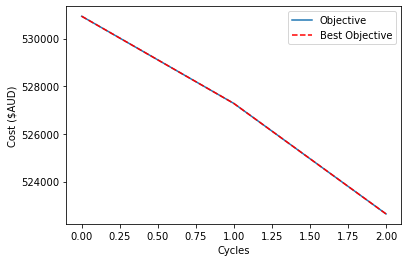

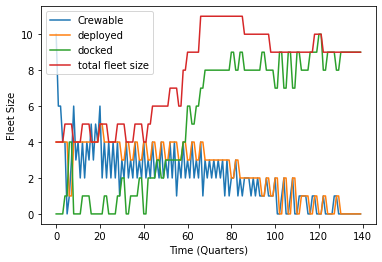

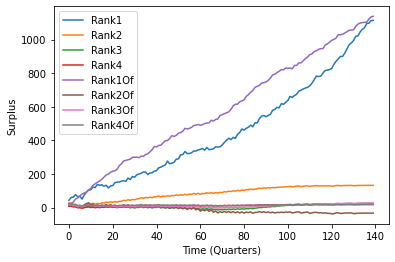

In [20]:
#Record and Plot results of Optimisation 
import os

filename="PROMOutput"
i = 0
while True:
    i += 1
    newname = '{}{:d}.txt'.format(filename, i)
    if os.path.exists(newname):
        continue
    with open(newname, "w") as text_file:
        print("Officer_max_rec: " + str(officer_max_rec)+ " Officer_min_rec: " + str(officer_min_rec)+" Sailor_max_rec: " + str(sailor_max_rec)+ " Sailor_min_rec: " + str(sailor_min_rec),file=text_file)
        print('Best solution (Officer / Sailor): ' + str(x_current)+'Best objective: ' + str(f_current),file=text_file)
        print("Cycles: "+ str(num_cycles) + " Trials: " + str(num_trials)+"Time: "+str(timeNow),file=text_file)
        break
filename="PROMCost"
fig = plt.figure()
rect = fig.patch
rect.set_facecolor("white")
plt.plot(f_stored, label="Objective")
plt.plot(fbest,'r--',label='Best Objective')
plt.legend()
plt.xlabel("Cycles")
plt.ylabel("Cost ($AUD)")
i = 0
while True:
    i += 1
    newname = '{}{:d}.png'.format(filename, i)
    if os.path.exists(newname):
        continue
    plt.savefig(newname)
    break
a,b,c,d,e,f,g,h,i1,j,k=policyOut(kronos,x_current, 0.1, 0.0,y_current,z_current)
 #a=crewable, b=deployed c=docked d=sailorR1 e=sailorR2 f=sailor2R3 g=sailorR4,
    #h=officerR1 i=officerR2 j=officerR3 k=officerR4
print(np.mean(c))
print((1-(np.mean(c)/(xt))))
fig1 = plt.figure()
rect = fig1.patch
rect.set_facecolor("white")
plt.plot(a, label="Crewable")
plt.plot(b,label='deployed')
plt.plot(c,label='docked')
plt.plot((np.add(b,c)),label='total fleet size')
plt.legend()
plt.xlabel("Time (Quarters)")
plt.ylabel("Fleet Size")
filename='PROMAvab'
i = 0
while True:
    i += 1
    newname = '{}{:d}.png'.format(filename, i)
    if os.path.exists(newname):
        continue
    plt.savefig(newname)
    break
#['Crewable','deployed','docked'])
fig2 = plt.figure()
rect = fig2.patch
rect.set_facecolor("white")
plt.plot(d,label='Rank1')
plt.plot(e,label='Rank2')
plt.plot(f,label='Rank3')
plt.plot(g,label='Rank4')
plt.plot(h,label='Rank1Of')
plt.plot(i1,label='Rank2Of')
plt.plot(j,label='Rank3Of')
plt.plot(k,label='Rank4Of')
plt.legend()
plt.xlabel("Time (Quarters)")
plt.ylabel("Surplus")
filename='PROMSurplus'
i = 0
while True:
    i += 1
    newname = '{}{:d}.png'.format(filename, i)
    if os.path.exists(newname):
        continue
    plt.savefig(newname)
    break
   
    

